<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch6_1~3_pg_377~395_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 완벽가이드 ch6. 1 ~ 3 pg. 377 ~ 395 필사


# CH06. 차원 축소

## CH06.01. 차원 축소(Dimension Reduction) 개요
: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것

> 피처 많은 다차원 데이터의 문제점
- 일반적으로, 차원이 증가 > 데이터 포인트 간 거리 기하급수적으로 증가 > 희소(sparse)한 구조 가지게 됨
- 피처가 많은 다차원 데이터일수록 그렇지 않은 모델보다 예측 신뢰도 떨어짐
- 피처가 많을 경우, 개별 피처 간에 상관관계 높을 가능성 > 다중 공선성 문제 발생 > 모델 예측 성능 저하
- 시각적으로 데이터 특성 파악 불가
- 학습에 필요한 처리 능력 증가

**매우 많은 다차원의 피처를 차원 축소해 피처수를 줄이면 더 직관적으로 데이터 해석 가능**


**차원 축소의 종류**
- 피처 선택(feature selection, 특성 선택) : 특정 피처에 종속성이 강한 불필요한 피처를 아예 **삭제**하고, 데이터의 특징을 잘 나타내는 주요 피처만 삭제하는 것

- 피처 추출(feature extraction) : 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 저차원의 중요 피처로 압축해서 추출하는 것 / 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출하는 것
 - ex. 학생의 수학, 국어, 체육... 성적 > 학생의 학업 성취도


#### 차원축소 알고리즘의 적용 영역 

1. 이미지 데이터
: 많은 픽셀로 이루어진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축 수행 가능
    - 원본보다 훨씬 적은 차원 > 분류 수행 시 과적합 영향력(적은 픽셀의 차이가 잘못된 예측으로 이어질 수 있음) 감소 > 원본데이터로 예측보다 예측 성능 높일 수 있음

2. 텍스트 문서의 숨겨진 의미 추출하기
: 차원 축소 알고리즘 이용 시, 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하고 이를 찾아낼 수 있음
    - SVD, NMF : 시맨틱 토픽(Semantic Topic) 모델링을 위한 기반 알고리즘으로 사용됨


**대표적인 차원 축소 알고리즘**
- PCA
- LDA
- SVD
- NMF

## CH06.02. PCA((Principal Component Analysis)

### PCA 개요
: 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법
- 가장 대표적인 차원 축소 기법
- 기존 데이터의 정보 유실의 최소화 방법 : **가장 높은 분산을 가지는 데이터의 축**을 찾아 이 축으로 차원 축소 > PCA의 주성분
    - 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주하는 것
    - ex. 2개의 피처(키, 몸무게)를 가지고 있는 데이터셋 : 한 개의 주성분을 가진 데이터 세트로 차원 축소 매커니즘

   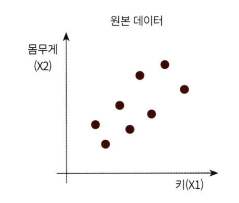
   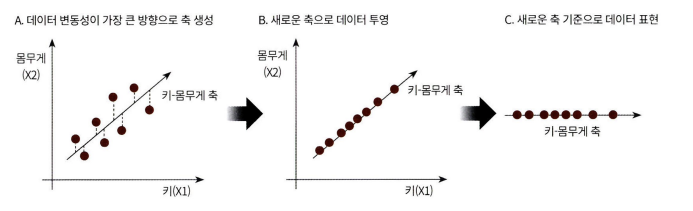


**- PCA의 차원 축소 매커니즘**

1. 가장 큰 데이터 변동성(variance) 기반으로 첫 번째 벡터 축 생성하기
2. 1번에서 생성한 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 하는 두 번째 축 생성하기
3. 2번에서 생성한 축과 직각이 되는 벡터를 설정하는 방식으로 축 생성 반복하기
4. 생성된 벡터 축에 원본 데이터 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨

    - 결과
    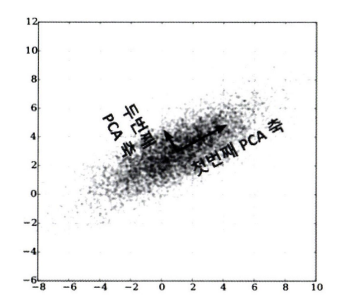

**PCA = 주성분 분석 : 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성 대부분 설명할 수 있는 분석법**

#### PCA의 선형대수 관점 
***PCA: 입력 데이터의 공분산 행렬(Coveriance Matrix)을 고유벡터(=PCA의 주성분 벡터, 입력 데이터의 분산이 큰 방향 나타냄)와 고유값(=고유벡터의 크기, 입력 데이터의 분산)로 분해 가능 > 얻은 고유벡터에 입력 데이터 선형 변환하는 방식**
> Steps
 1. 입력 데이터 세트의 공분산 행렬 생성
 2. 공분산 행렬의 고유 벡터와 고유값 계산
 3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유 벡터 추출
 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

 **PCA : 많은 속성으로 구성된 원본 데이터를 그 핵심을 구성하는 데이터로 압축한 것**

##### 4개의 속성으로 되어 있는 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인하기

1. 사이킷런 붓꽃 데이터 로딩 후 DataFrame으로 변환하기

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이의 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


2. 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원(x: sepal length, y : sepal width)으로 시각화하기

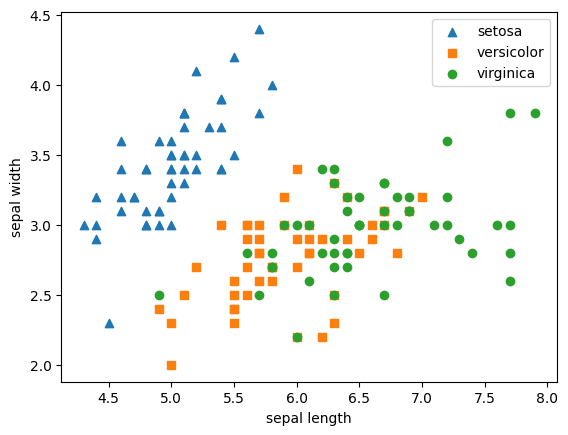

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

3. PCA로 4개 속성을 2개로 압축한 뒤 2번과 비슷하게 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화하기

- 3.1. 데이터 개별 속성을 함께 스케일링하기
    - PCA : 여러 속성의 값 연산 > 속성의 스케일에 영향 받음 = PCA 적용 전 각 속성값을 동일한 스케일로 변환 필요!
    - 여기에서는 표준정규분포(평균 0, 분산 1)로 속성값들 변환

In [3]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

- 3.2. 스케일링이 적용된 데이터 세트에 PCA를 적용해 4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 PCA 속성) PCA 데이터로 변환하기
 - 사이킷런의 PCA 클래스 - PCA(n_components= PCA로 변환할 차원의 수) 입력받음 > fit(입력 데이터 세트) > transform(입력 데이터 세트) 호출

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반한
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


4. 원본 데이터 세트를 반환하여 생성한 (150,2)의 넘파이 행렬 데이터 세트 iris_pca 객체 변수를 DataFrame으로 변환한 뒤 데이터값 확인하기

In [5]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


5. 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화해보기
 - X축 : 'pca_component_1' /  Y축 : 'pca_component_2'

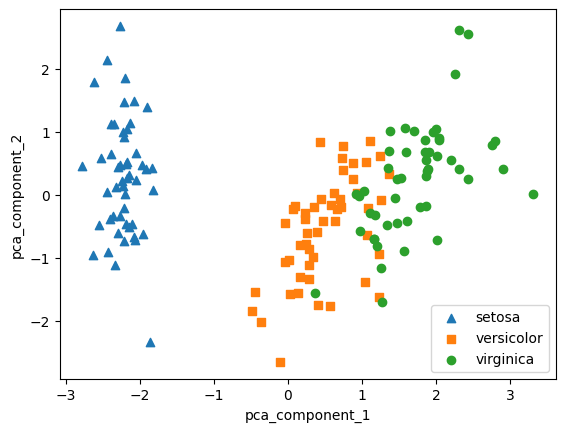

In [6]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

# pca_component_1을 x축, pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

> 결과 : PCA로 변환 후에도 pca_component_1 축을 기반으로 명확하게, 혹은 겹치는 부분이 있더라도 비교적 잘 구분된
- PCA의 첫 번째 새로운 축 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문


6. PCA Component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보기
 - PCA 객체의 explained_variance_ratio_ 속성 : 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


> 결과 
- 전체 변동성에서 차지하는 비율: pca_component_1 : 72.9% / pca_component_2 : 22.8% 


7. 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과 비교
- Estimator : RandomForestClassifier
- cross_val_score()로 3개의 교차 검증 세트로 정확도 결과 비교

- 7.1. 원본 붓꽃 데이터에 랜덤 포레스트 적용하기

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


- 7.2. 기본 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트 적용해보기

In [9]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores_pca)
print('원본 데이터 평균 정확도:', np.mean(scores_pca))

원본 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
원본 데이터 평균 정확도: 0.88


> 결과
- 원본 데이터 세트 대비 예측 정확도 : PCA 변환 차원 개수에 따라 예측 성능 떨어질 수밖에 없음
- 피처 4개 > 2개 (50% 감소) / 성능 10% 감소 > PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음

#### iris 데이터 세트보다 좀 더 많은 피처를 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변환한 뒤, 예측 영향도가 어떻게 되는지 변환된 PCA 데이터 세트에 기반해서 비교해보기
- UCI Machine Learning Repository의 신용카드 고객 데이터 세트 이용

1. 저장된 credit_card.xls 데이터 세트를 DataFrame으로 로딩하기
- 엑셀 파일의 DataFrame 로드 : read_excel()

In [10]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


> 결과 - 신용카드 데이터 세트
- 30000개의 레코드, 24개의 속성
- 'default payment next month'(=다음달 연체 여부) : Target 값(연체=1,정상납부=0)

2. 칼럼명 변경(PAY0>PAY1, 'default payment next month' > 'default'), Target 속성 y_target 변수로 별도 저장 후 타겟값 제외한 피처 데이터를 별도의 DataFrame으로 생성하기

In [11]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

3. DataFrame의 corr() 이용해 각 속성 간의 상관도 구한 뒤(각 속성끼리 상관도 매우 높음), 이를 시본의 heatmap으로 시각화하기

<Axes: >

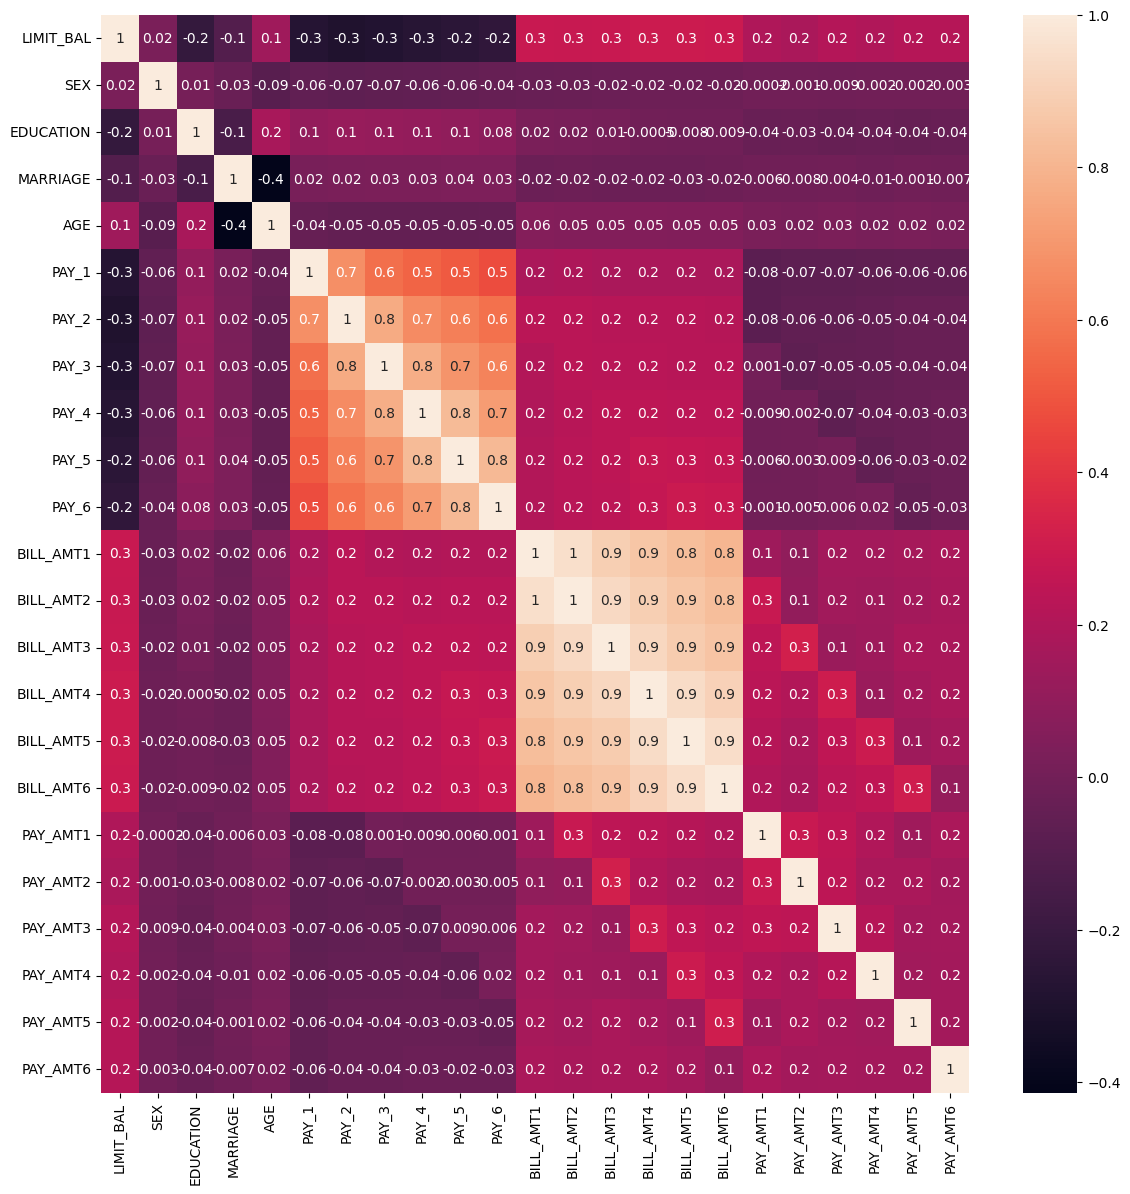

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

> 결과 - 상관도
- BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도 대부분 0.9 이상 > 매우 높음 >> 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성 수용할 수 있음



4. BILL_AMT1 ~ BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤, 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성으로 알아보기

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explain_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


> 결과 - 전체 변동성에서 차지하는 비율
- 첫 번째 PCA 축 : 90.6% / 두 번째 축 : 5.1% > 6개 속성의 상관도가 매우 높음


5. 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과 상호 비교하기
- 5.1. 원본 데이터 세트에 랜덤 포레스트를 이용해 타깃 값이 디폴트 값을 3개의 교차 검증 세트로 분류하기

In [19]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


> 결과 : 3개의 교차 검증 세트에서 평균 예측 정확도 : 81.70%



- 5.2. 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해서 동일하게 분류 예측 적용하기

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.791  0.797  0.8027]
PCA 변환 데이터 셋 평균 정확도:0.7969


> 결과 
- 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2%의 예측 성능 저하만 발생
- PCA의 뛰어난 압축 능력을 잘 보여주는 사례


PCA : 차원 축소를 통해 데이터 쉽게 인지하는 데 활용할 뿐만 아니라, '컴퓨터 비전(Computer Vision)' 등에 더 활발히 사용됨
- ex. 얼굴 인식 - Eigen-face PCA 변환 : 원본 얼굴 이미지를 변환해 사용하는 경우 다수

## CH06.03. LDA(Linear Discriminant Analysis)
: 선형 판별 분석법, PCA와 매우 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원 축소하는 기법
- PCA와의 중요한 차이 : LDA : 지도학습의 분류(Classifiacation)에 사용하기 쉽도록 개별 클래스 분별할 수 있는 기준 최대한 유지하면서 차원 축소함
- 입력 데이터 결정 값 클래스를 최대한으로 분리할 수 있는 축 찾기 (<->PCA: 입력 데이터의 변동성이 가장 큰 축 찾기)

**LDA의 매커니즘**
- 특정 공간상에서 클래스 분리를 최대화하는 축 찾기 > **클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원 축소**

    = 클래스 간 분산은 최대한 크게 가져가기 + 클래스 내부의 분산 최대한 작게 가져가기 (표현 그림: 아래에)
    
    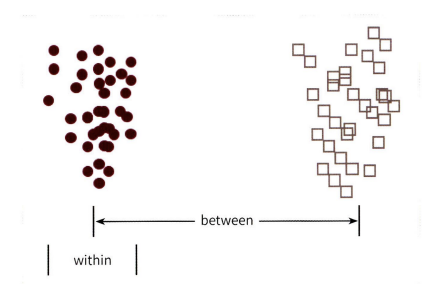


**LDA를 구하는 스텝**

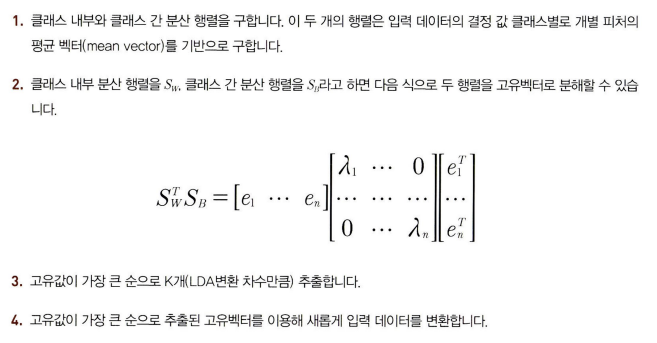

### 붓꽃 데이터 세트에 LDA 적용하기
- 붓꽃 데이터 세트를 사이킷런의 LDA-LinearDiscriminantAnalysis 클래스로 제공-을 이용해 변환하고, 그 결과를 품종 별로 시각화하기



1. 붓꽃 데이터 세트를 로드하고 표준 정규 분포로 스케일링하기

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

2. 2개의 컴포넌트로 붓꽃 데이터를 LDA 변환하기
- LDA : 지도 학습 > 클래스의 결정값이 변환 시에 필요!

In [22]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


3. LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현하기

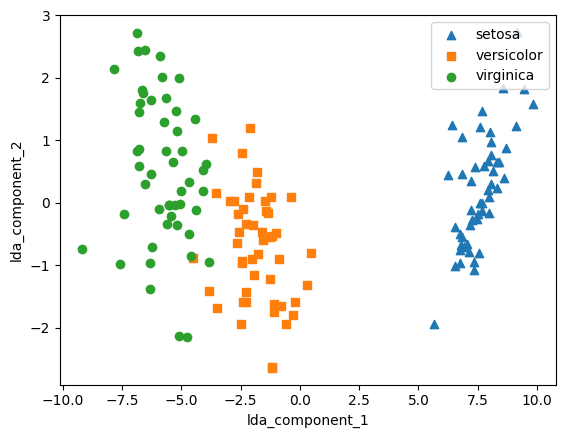

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()